# PROBLEM STATEMENT

pada ksus ini perusahaan belum memiliki strstegi dan arah yang tepat untuk menawaekan produk produk mereka pada calon nasabah atau nasabah sesuai dengan segmen nasabah atau calon nasabah 

# OBJECTIVE PROJECT

membuat model clusterisasi untuk mengetahui kepemilikan produk berdasarkan demografi nasabah yang saat ini sudah menggunakan layanan dengan silhouette score >0.7 

# VARIABEL YANG TERSEDIA 

dari dataset yang dimiliki pada dataset di github ada beberapa coulumns yang tersedia diantaranya :
1. GCIF = unique identifier nasabah 
2. Area = lokasi nasabah 
3. Jalur_Pembukaan = Touch Points nasabah membuka produk ---> via cabang, Telemarketing, Aplikasi Digital, Internet Banking
4. Vintage = Durasi menjadi nasabah (sejak pertama kali membuka akun)
5. Usia = usia nasabah 
6. Jenis_Kelamin = jenis kelamin nasabah yang dinotasikan (Laki laki(1) dan perempuan (0))
7. Status_Perkawian = status nasabah yang dinotasikan (belum menikah(0), Menikah (1), cerai (2) dan Janda/Duda(3) )
8. Jumlah_Anak = jumlah anak nasabah (numerik)
9. Pendidikan = Status pendidikan terakhir ---> dinotasikan. tidak memiliki pendidikan formal (0), SD(1), SMP (2), SMA (3), Sarjana (4), Magister (5), Doktor (6)
10. Produk_Tabungan = Status Kepemilikan Produk (yes/1, No/0)
11. Produk_Deposito = Status Kepemilikan Produk (yes/1, No/0)
12. Produk_Kartu_Kredit = Status Kepemilikan Produk (yes/1, No/0)
13. Produk_Kredit_Rumah = Status Kepemilikan Produk (yes/1, No/0)
14. Produk_Kredit_Kendaraan = Status Kepemilikan Produk (yes/1, No/0)
15. Produk_Kredit_Dana_Tunai = Status Kepemilikan Produk (yes/1, No/0)
16. Total_Kepemilikan_Produk = Jumlah Produk Yang Dimiliki (Penjumlahan dari seluruh produk yang tersedia)
17. Pendapatan_Tahunan = Rata rata pendapatan dalam setahun 
18. Total_Relationship_Balance = Total asset nasabah dalam cutoff Bulan observasi 

# EXPERIMENT 

point of view  dalam pengerjaan 
1. dikelompokkan berdasarkan demografis untuk dicari pattern kepemilikan produk 
2. dikelompokkan berdasarkan kepemilikan jenis produk untuk dicari pattern berdasarkan demografisnya 

# HANDS ON CODING 



In [4]:
# import package 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time 

In [5]:
pd.set_option('display.max_columns', None)

## Data Clustering, Import dataset 

In [6]:
path_1 = "https://raw.githubusercontent.com/brainspopper/dataset/main/clustering_data.csv"
data = pd.read_csv(path_1)
data.dtypes 

GCIF                           object
Area                           object
Jalur_Pembukaan                object
Vintage                        object
Usia                          float64
Jenis_Kelamin                  object
Status_Perkawinan              object
Jumlah_Anak                     int64
Pendidikan                     object
Produk_Tabungan                 int64
Produk_Deposito                 int64
Produk_Kartu_Kredit             int64
Produk_Kredit_Rumah             int64
Produk_Kredit_Kendaraan         int64
Produk_Kredit_Dana_Tunai        int64
Total_Kepemilikan_Produk        int64
Pendapatan_Tahunan              int64
Total_Relationship_Balance      int64
dtype: object

In [7]:
# Data Understanding 
data.groupby(('Area'))['Area'].count()

Area
Bandung     6917
Bogor       1191
Jakarta     7017
Jogja       3001
Solo        5001
Surabaya    5002
Name: Area, dtype: int64

In [8]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
data.groupby('Area')[num_cols].mean()


,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Area,,,,,,,,,,,
Bandung,42.562310,1.296516,0.925401,0.599682,0.329767,0.587393,0.163076,0.537516,3.142836,405.124910,2.454722e+08
Bogor,42.660451,1.366919,0.921075,0.596977,0.324097,0.582704,0.160369,0.554996,3.140218,402.227540,2.499853e+08
Jakarta,42.696995,1.322930,0.925467,0.603534,0.336184,0.590708,0.169873,0.540829,3.166595,406.478552,2.485876e+08
Jogja,42.512422,1.309897,0.934355,0.608464,0.333555,0.594469,0.158614,0.535155,3.164612,402.694768,2.496616e+08
Solo,42.445452,1.270746,0.922416,0.603479,0.337932,0.604679,0.156969,0.540492,3.165967,408.010198,2.507478e+08
Surabaya,42.768980,1.284486,0.927629,0.608357,0.329668,0.585566,0.168533,0.528589,3.148341,409.074370,2.523277e+08


In [9]:
data.groupby(('Vintage'))['Vintage'].count()

Vintage
2 - 3 Tahun    13953
< 1 Tahun       9278
> 4 Tahun       4898
Name: Vintage, dtype: int64

In [10]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
data.groupby('Vintage')[num_cols].mean()

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Vintage,,,,,,,,,,,
2 - 3 Tahun,42.578850,1.291694,0.927256,0.607755,0.328531,0.589336,0.163764,0.539311,3.155952,407.679639,2.489367e+08
< 1 Tahun,42.689341,1.294676,0.931235,0.592585,0.336495,0.594201,0.164798,0.523389,3.142703,395.611231,2.486679e+08
> 4 Tahun,42.571866,1.338301,0.912822,0.613107,0.338914,0.592691,0.163536,0.560637,3.181707,422.593508,2.500646e+08


In [11]:
data.groupby(('Jalur_Pembukaan'))['Jalur_Pembukaan'].count()

Jalur_Pembukaan
Aplikasi Digital     6216
Cabang               5856
Internet Banking     5795
Telemarketing       10262
Name: Jalur_Pembukaan, dtype: int64

In [12]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
data.groupby('Jalur_Pembukaan')[num_cols].mean()

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Jalur_Pembukaan,,,,,,,,,,,
Aplikasi Digital,42.442089,1.292149,0.930180,0.598456,0.323681,0.593147,0.165541,0.535714,3.146718,405.278314,2.489950e+08
Cabang,42.560627,1.308743,0.924180,0.610143,0.325478,0.583675,0.153518,0.544740,3.141735,409.923156,2.456661e+08
Internet Banking,42.723992,1.302502,0.928387,0.597929,0.347368,0.598965,0.169802,0.531493,3.173943,406.593270,2.517532e+08
Telemarketing,42.676514,1.300526,0.923309,0.606412,0.334730,0.590821,0.165952,0.538589,3.159813,404.674527,2.494725e+08


In [13]:
data.groupby(('Status_Perkawinan'))['Status_Perkawinan'].count()

Status_Perkawinan
Belum Menikah     8168
Cerai             4077
Janda/Duda        4045
Menikah          11839
Name: Status_Perkawinan, dtype: int64

In [14]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
data.groupby('Status_Perkawinan')[num_cols].mean()

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Status_Perkawinan,,,,,,,,,,,
Belum Menikah,39.571621,0.000000,1.000000,0.596107,0.333374,0.331660,0.160749,0.499633,2.921523,420.636141,2.423448e+08
Cerai,50.226883,2.003679,1.000000,0.607555,0.337258,0.509688,0.172676,0.389747,3.016924,426.269070,2.393499e+08
Janda/Duda,NaN,1.201978,1.000000,0.609889,0.337948,0.597281,0.161187,0.401731,3.108035,289.648208,2.474754e+08
Menikah,42.084467,1.989948,0.824309,0.605457,0.329504,0.797027,0.164372,0.661542,3.382211,429.378833,2.575412e+08


## Data Preparation 


pengecekan data duplikat dan *missing* Data 

In [15]:
#cek data kosong 
data.isnull().sum()

GCIF                             0
Area                             0
Jalur_Pembukaan                  0
Vintage                          0
Usia                          4045
Jenis_Kelamin                    0
Status_Perkawinan                0
Jumlah_Anak                      0
Pendidikan                       0
Produk_Tabungan                  0
Produk_Deposito                  0
Produk_Kartu_Kredit              0
Produk_Kredit_Rumah              0
Produk_Kredit_Kendaraan          0
Produk_Kredit_Dana_Tunai         0
Total_Kepemilikan_Produk         0
Pendapatan_Tahunan               0
Total_Relationship_Balance       0
dtype: int64

In [16]:
#penghapusan atau drop data yang kosong 
data = data.dropna()

In [17]:
#melihat kembali data yang kosong 
data.isnull().sum()

GCIF                          0
Area                          0
Jalur_Pembukaan               0
Vintage                       0
Usia                          0
Jenis_Kelamin                 0
Status_Perkawinan             0
Jumlah_Anak                   0
Pendidikan                    0
Produk_Tabungan               0
Produk_Deposito               0
Produk_Kartu_Kredit           0
Produk_Kredit_Rumah           0
Produk_Kredit_Kendaraan       0
Produk_Kredit_Dana_Tunai      0
Total_Kepemilikan_Produk      0
Pendapatan_Tahunan            0
Total_Relationship_Balance    0
dtype: int64

In [18]:
#cek dan melihat data yang double atau duplicate 
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
28122    False
28123    False
28124    False
28125    False
28126    False
Length: 24084, dtype: bool

In [19]:
data.duplicated().sum()

0

## Pengecekan Data Outlier 

In [20]:
data.count()

GCIF                          24084
Area                          24084
Jalur_Pembukaan               24084
Vintage                       24084
Usia                          24084
Jenis_Kelamin                 24084
Status_Perkawinan             24084
Jumlah_Anak                   24084
Pendidikan                    24084
Produk_Tabungan               24084
Produk_Deposito               24084
Produk_Kartu_Kredit           24084
Produk_Kredit_Rumah           24084
Produk_Kredit_Kendaraan       24084
Produk_Kredit_Dana_Tunai      24084
Total_Kepemilikan_Produk      24084
Pendapatan_Tahunan            24084
Total_Relationship_Balance    24084
dtype: int64

In [21]:
# mendeteksi dan mengatasi data ouliers menggunakan z-score 
from scipy import stats 
z_score = stats.zscore(data[['Usia', 'Pendapatan_Tahunan', 'Total_Relationship_Balance']])
data = data[(z_score < 3).all(axis=1)] #menghapus data dengan z score lebih dari 3 

In [22]:
data.count()

GCIF                          23704
Area                          23704
Jalur_Pembukaan               23704
Vintage                       23704
Usia                          23704
Jenis_Kelamin                 23704
Status_Perkawinan             23704
Jumlah_Anak                   23704
Pendidikan                    23704
Produk_Tabungan               23704
Produk_Deposito               23704
Produk_Kartu_Kredit           23704
Produk_Kredit_Rumah           23704
Produk_Kredit_Kendaraan       23704
Produk_Kredit_Dana_Tunai      23704
Total_Kepemilikan_Produk      23704
Pendapatan_Tahunan            23704
Total_Relationship_Balance    23704
dtype: int64

## Filtering Data Telemarketing

In [59]:
data0 = data[data['Jalur_Pembukaan']=='Telemarketing']

In [60]:
data0 

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
7,G13193,Solo,Telemarketing,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
8,G09296,Jakarta,Telemarketing,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
9,G09228,Jakarta,Telemarketing,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28089,G19583,Bandung,Telemarketing,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
28090,G18081,Jakarta,Telemarketing,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
28092,G18530,Bandung,Telemarketing,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
28095,G03782,Jogja,Telemarketing,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


In [61]:
data0 =data0.drop(columns=['GCIF', 'Jalur_Pembukaan']).reset_index(drop=True)

In [62]:
data0 = data0.reset_index()

In [63]:
data0 

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
1,1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
2,2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
3,3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
4,4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
8649,8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
8650,8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
8651,8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


## Pembagian Dataset untuk Eksperimen 

1. eksperimen 0 = semua variable digunakan
2. eksperimen 1 = menggunakan demographics 
3. eksperimen 2 = menggunakan financial related variable 

In [64]:
data1 = data0.iloc[:,1:8]

In [65]:
data1 

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal
8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal
8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal
8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal


In [66]:
data2 = data0.iloc[:,8:17]

In [67]:
data2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...
8648,1,1,1,1,0,1,5,489,321693904
8649,1,1,1,1,1,0,5,658,224477967
8650,1,1,1,1,0,1,5,585,411871605
8651,1,1,0,1,1,1,5,279,161744694


melakukan encoding untuk data category

In [68]:
data1 = pd.get_dummies(
    data1,
    columns=['Area', 'Jenis_Kelamin', 'Status_Perkawinan', 'Pendidikan', 'Vintage'],
    dtype=int
)

In [69]:
data1 

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Status_Perkawinan_Menikah,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,30.0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,29.0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,49.0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,21.0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0
8649,58.0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0
8650,42.0,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0
8651,44.0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0


## Standarisai Data Numerik 

In [70]:
predname_num = data2.columns
predname_num 

Index(['Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit',
       'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [71]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
x_num = pd.DataFrame(pt.fit_transform(data2))
x_num.head()

,0,1,2,3,4,5,6,7,8
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


In [72]:
x_num.columns = predname_num
x_num.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


## Pengecekan Korelasi 

In [73]:
corrtest1 = data1.corr().abs()
corrtest2 = x_num.corr().abs()

In [74]:
# membuang nilai redundan pada matriks 
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(np.bool_))
upper1 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(np.bool_))

# mencari nilai yang berkorelasi diatas 0.7 
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.7)]

# menghapus kolom yang berkolerasi diatas 0.7
data1 = data1.drop(to_drop, axis=1, errors='ignore')
data2 = data2.drop(to_drop, axis=1, errors='ignore')

In [75]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
1,30.0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0
2,29.0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0
3,49.0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
4,21.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
8649,58.0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0
8650,42.0,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0
8651,44.0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0


In [76]:
x_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


### Gabungan Keduanya 

In [77]:
data_combined = pd.concat([data1, x_num], axis=1, join='inner')
data_combined 

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,23.0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,30.0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,29.0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,49.0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,21.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,58.0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,42.0,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,44.0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


## Modelling dan Evaluation 

pembangunan model akan menggunakan dua algoritma 
1. K-Means
2. K-Medioid 

pengecekanya menggunakan silhouette score 

### K-Means

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns 

Experiment 0 

In [82]:
# variasi Hyperparameter (jumlah cluster)
for n_clusters in range (3, 6):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_labels = kmeans.fit_predict(data_combined)
    silhouette_avg = silhouette_score(data_combined, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp0_'+str(n_clusters)] = cluster_labels 

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -3 : 0.4337636155000406


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -4 : 0.4337636155000406


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -5 : 0.4337636155000406


Experiment 1

In [83]:
# variasi Hyperparameter (jumlah cluster)
for n_clusters in range (3, 6):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_labels = kmeans.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp0_'+str(n_clusters)] = cluster_labels 

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -3 : 0.5001832110224678


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -4 : 0.5001832110224678


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -5 : 0.5001832110224678


Experiment 2

In [84]:
# variasi Hyperparameter (jumlah cluster)
for n_clusters in range (3, 6):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_labels = kmeans.fit_predict(x_num)
    silhouette_avg = silhouette_score(x_num, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp0_'+str(n_clusters)] = cluster_labels 

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -3 : 0.18408368480533616


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -4 : 0.18408368480533616


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score (K-Means) -5 : 0.18408368480533616


### K_Medoids 

In [85]:
pip install scikit-learn-extra

   ---------------------------------------- 0.0/346.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/346.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/346.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/346.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/346.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/346.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/346.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/346.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/346.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/346.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/346.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/346.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/346.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/346.4 kB ? eta -:--:


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
from sklearn_extra.cluster import KMedoids

Experiment 0 

In [88]:
for n_clusters in range (3, 6):
    Kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = Kmedoids.fit_predict(data_combined)
    silhouette_avg = silhouette_score(data_combined, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_Kmedoids_EXp0_'+str(n_cluster)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.43369790762336996
Silhouette Score (K-Medoids) -4 : 0.33519427927551565
Silhouette Score (K-Medoids) -5 : 0.3211940252247904


Experiment 1

In [89]:
for n_clusters in range (3, 6):
    Kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = Kmedoids.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_Kmedoids_EXp0_'+str(n_cluster)] = cluster_labels

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -3 : 0.0050675633465087746


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -4 : 0.4657942038387023


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -5 : 0.4178025801646672


Experiment 2 

In [90]:
for n_clusters in range (3, 6):
    Kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = Kmedoids.fit_predict(x_num)
    silhouette_avg = silhouette_score(x_num, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_Kmedoids_EXp0_'+str(n_cluster)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.11659038864364947
Silhouette Score (K-Medoids) -4 : 0.09680611087667028
Silhouette Score (K-Medoids) -5 : 0.08883545658405254


## Analisa Hasil 

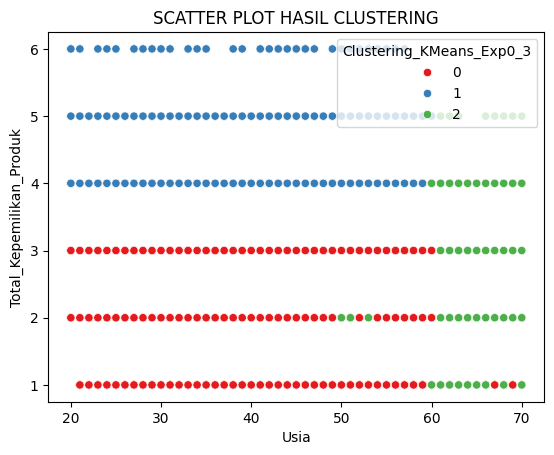

In [97]:
sns.scatterplot(data=data0, x='Usia', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp0_3', palette='Set1')
plt.title('SCATTER PLOT HASIL CLUSTERING')
plt.show()

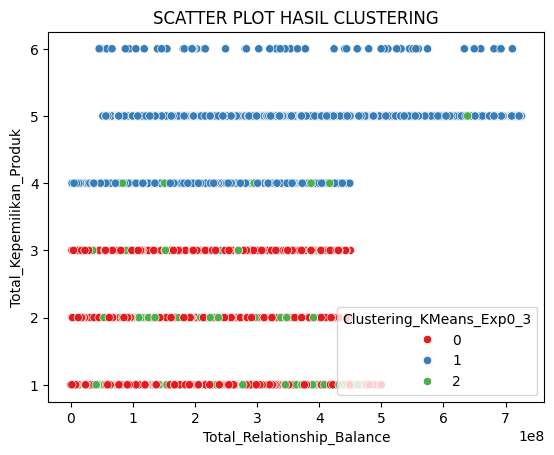

In [102]:
sns.scatterplot(data=data0, x='Total_Relationship_Balance', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp0_3', palette='Set1')
plt.title('SCATTER PLOT HASIL CLUSTERING')
plt.show()

In [107]:
cluster_means = data0[['Usia','Jumlah_Anak','Produk_Tabungan','Produk_Deposito','Produk_Kartu_Kredit','Produk_Kredit_Rumah','Produk_Kredit_Kendaraan','Produk_Kredit_Dana_Tunai','Total_Kepemilikan_Produk','Total_Relationship_Balance','Clustering_KMeans_Exp0_3']].groupby('Clustering_KMeans_Exp0_3').mean()
print(cluster_means)
pd

                               Usia  Jumlah_Anak  Produk_Tabungan  \
Clustering_KMeans_Exp0_3                                            
0                         41.107113     1.097962              1.0   
1                         39.847109     1.471741              1.0   
2                         63.644133     1.931122              0.0   

                          Produk_Deposito  Produk_Kartu_Kredit  \
Clustering_KMeans_Exp0_3                                         
0                                0.453203             0.187812   
1                                0.820320             0.530219   
2                                0.621173             0.377551   

                          Produk_Kredit_Rumah  Produk_Kredit_Kendaraan  \
Clustering_KMeans_Exp0_3                                                 
0                                    0.400998                 0.081323   
1                                    0.815093                 0.285528   
2                          

<module 'pandas' from 'c:\\Users\\LENOVO\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\pandas\\__init__.py'>

Group 0 

In [108]:
data0[data0['Clustering_KMeans_Exp0_3']==0][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,4808.000000,4808.000000,4808.00000,4.808000e+03
mean,41.107113,1.097962,2.50520,2.252790e+08
std,11.020829,1.440943,0.64726,1.304466e+08
min,20.000000,0.000000,1.00000,1.028000e+03
25%,31.000000,0.000000,2.00000,1.135310e+08
50%,42.000000,0.000000,3.00000,2.230439e+08
75%,51.000000,2.000000,3.00000,3.391630e+08
max,69.000000,4.000000,3.00000,4.999814e+08


In [109]:
data0[data0['Clustering_KMeans_Exp0_3']==0]['Area'].value_counts(normalize=True)

Area
Jakarta     0.480241
Bandung     0.171589
Surabaya    0.128536
Solo        0.114393
Jogja       0.078411
Bogor       0.026830
Name: proportion, dtype: float64

In [110]:
data0[data0['Clustering_KMeans_Exp0_3']==0]['Vintage'].value_counts(normalize=True)

Vintage
2 - 3 Tahun    0.500416
< 1 Tahun      0.298669
> 4 Tahun      0.200915
Name: proportion, dtype: float64

In [111]:
data0[data0['Clustering_KMeans_Exp0_3']==0]['Pendidikan'].value_counts(normalize=True)

Pendidikan
Sarjana                 0.266847
SD                      0.190100
SMA                     0.187604
Doktor                  0.091098
Tidak Sekolah Formal    0.090682
SMP                     0.090474
Magister                0.083195
Name: proportion, dtype: float64

In [112]:
data0[data0['Clustering_KMeans_Exp0_3']==0]['Jenis_Kelamin'].value_counts(normalize=True)

Jenis_Kelamin
Laki-laki    0.669301
Perempuan    0.330699
Name: proportion, dtype: float64

Group 1

In [113]:
data0[data0['Clustering_KMeans_Exp0_3']==1][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3061.000000,3061.000000,3061.000000,3.061000e+03
mean,39.847109,1.471741,4.252859,2.647094e+08
std,10.629599,1.504330,0.478385,1.596604e+08
min,20.000000,0.000000,4.000000,1.094925e+06
25%,30.000000,0.000000,4.000000,1.335105e+08
50%,40.000000,1.000000,4.000000,2.573054e+08
75%,50.000000,3.000000,4.000000,3.734546e+08
max,60.000000,4.000000,6.000000,7.259942e+08


In [114]:
data0[data0['Clustering_KMeans_Exp0_3']==1]['Area'].value_counts(normalize=True)

Area
Jakarta     0.476642
Bandung     0.170206
Surabaya    0.129043
Solo        0.119569
Jogja       0.076772
Bogor       0.027769
Name: proportion, dtype: float64

In [116]:
data0[data0['Clustering_KMeans_Exp0_3']==1]['Vintage'].value_counts(normalize=True)

Vintage
2 - 3 Tahun    0.499837
< 1 Tahun      0.293695
> 4 Tahun      0.206468
Name: proportion, dtype: float64

In [117]:
data0[data0['Clustering_KMeans_Exp0_3']==1]['Pendidikan'].value_counts(normalize=True)

Pendidikan
Sarjana                 0.277360
SMA                     0.180007
SD                      0.179680
Doktor                  0.094087
Magister                0.092127
SMP                     0.089513
Tidak Sekolah Formal    0.087226
Name: proportion, dtype: float64

In [118]:
data0[data0['Clustering_KMeans_Exp0_3']==1]['Jenis_Kelamin'].value_counts(normalize=True)

Jenis_Kelamin
Laki-laki    0.651094
Perempuan    0.348906
Name: proportion, dtype: float64

Group 2 

In [119]:
data0[data0['Clustering_KMeans_Exp0_3']==2][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,784.000000,784.000000,784.000000,7.840000e+02
mean,63.644133,1.931122,2.628827,2.383638e+08
std,5.265822,1.383298,0.924333,1.335645e+08
min,50.000000,0.000000,1.000000,1.645485e+06
25%,61.000000,1.000000,2.000000,1.255725e+08
50%,65.000000,2.000000,3.000000,2.346645e+08
75%,68.000000,3.000000,3.000000,3.564984e+08
max,70.000000,4.000000,5.000000,6.603239e+08


In [120]:
data0[data0['Clustering_KMeans_Exp0_3']==2]['Area'].value_counts(normalize=True)

Area
Jakarta     0.489796
Bandung     0.155612
Solo        0.142857
Surabaya    0.123724
Jogja       0.059949
Bogor       0.028061
Name: proportion, dtype: float64

In [121]:
data0[data0['Clustering_KMeans_Exp0_3']==2]['Vintage'].value_counts(normalize=True)

Vintage
2 - 3 Tahun    0.485969
< 1 Tahun      0.321429
> 4 Tahun      0.192602
Name: proportion, dtype: float64

In [122]:
data0[data0['Clustering_KMeans_Exp0_3']==2]['Pendidikan'].value_counts(normalize=True)

Pendidikan
Sarjana                 0.260204
SD                      0.195153
SMA                     0.186224
Doktor                  0.096939
Tidak Sekolah Formal    0.096939
Magister                0.090561
SMP                     0.073980
Name: proportion, dtype: float64

In [123]:
data0[data0['Clustering_KMeans_Exp0_3']==2]['Jenis_Kelamin'].value_counts(normalize=True)

Jenis_Kelamin
Laki-laki    0.655612
Perempuan    0.344388
Name: proportion, dtype: float64

# Kesimpulan Analisis Clusterisasi Nasabah

Model clusterisasi (KMeans) berhasil mengelompokkan nasabah menjadi beberapa grup berdasarkan karakteristik keuangan seperti usia, saldo rata-rata, dan total kepemilikan produk.
→ Tiap cluster menunjukkan profil perilaku keuangan yang berbeda.

1. Cluster 0  cenderung berisi nasabah dengan saldo rata-rata rendah dan kepemilikan produk sedikit, bisa dikategorikan sebagai segmen risiko tinggi / potensi gagal bayar.

2. Cluster 1 berisi nasabah dengan usia menengah dan saldo moderat, biasanya menunjukkan nasabah aktif dan stabil, cocok untuk program loyalty & upselling produk baru.

3. Cluster 2 menunjukkan nasabah dengan saldo tinggi dan banyak produk bank yang dimiliki, kelompok ini bisa dianggap nasabah premium atau prioritas, potensial untuk retensi.

Korelasi antar variabel seperti Total_Balance, Avg_Balance, dan Avg_Product menunjukkan bahwa semakin tinggi saldo rata-rata, semakin banyak produk yang dimiliki, jadi fitur ini sangat relevan buat pembentukan cluster.

Hasil visualisasi scatter plot (misalnya Usia vs Total_Kepemilikan_Produk dengan hue Cluster) memperjelas bahwa setiap cluster punya pola sebaran unik, menunjukkan pemisahan yang cukup baik oleh model.

# Insight Dari Segi Bisnis 

Segmentasi ini bisa bantu bank dalam menentukan strategi penawaran produk:

→ Cluster saldo rendah = edukasi finansial / produk mikro.

→ Cluster menengah = promosi produk tabungan/investasi.

→ Cluster tinggi = layanan prioritas / wealth management.